In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics

import sklearn.preprocessing

import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab

import sklearn.mixture as mixture
import pyclustertend
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer

import random




In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import pandas as pd

#Estadistica de Hokpins
movies_df =pd.read_csv('./movies.csv', encoding='latin1')
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

variables = movies_df[['budget', 'revenue', 'runtime']].dropna()
variables['budget'] = variables['budget'].astype(str).str.replace(' ', '')

print(hopkins_statistic(variables.values))
  

0.9135306615339449


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


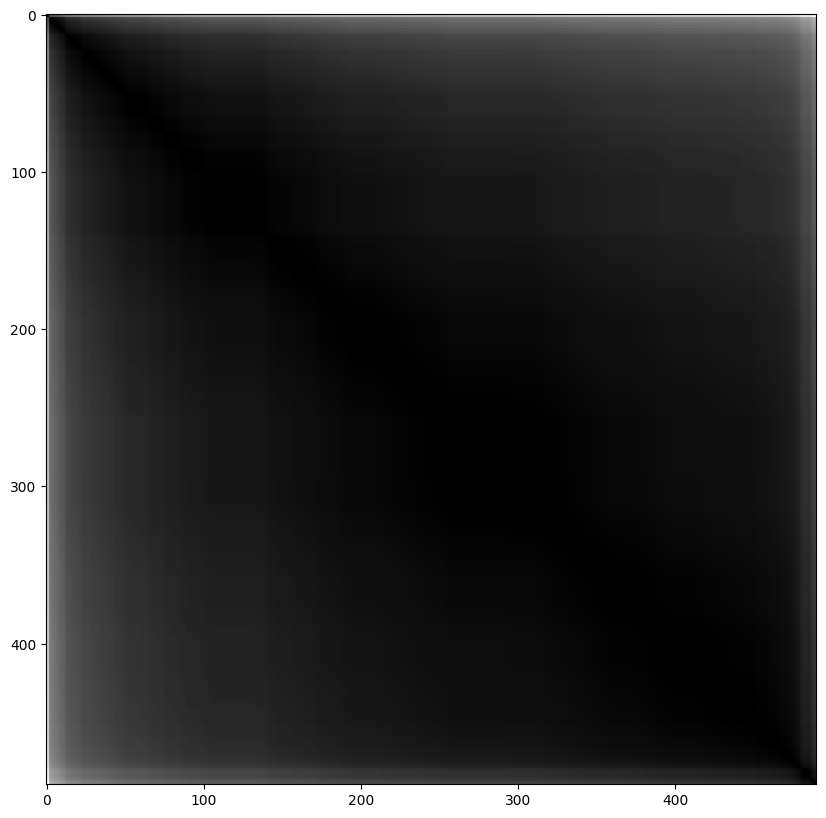

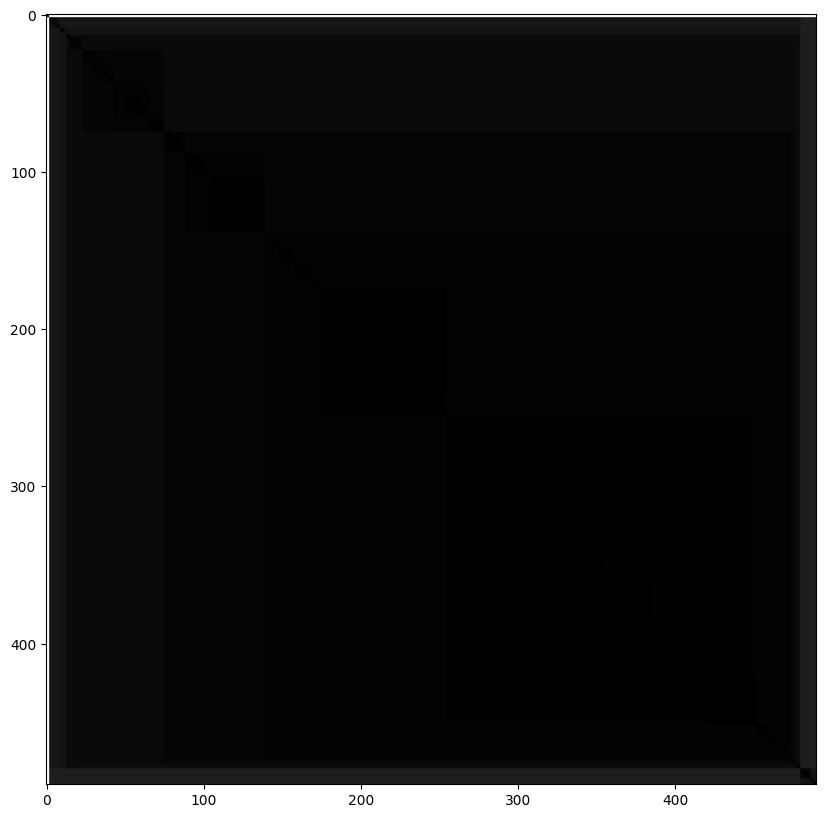

In [37]:
import pandas as pd
#import the packages
import pandas as pd # working with data
import numpy as np # working with arrays
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.preprocessing import scale

movies_df =pd.read_csv('./movies.csv', encoding='latin1')
# movies_df[['budget', 'revenue', 'runtime']] = movies_df[['budget', 'revenue', 'runtime']].fillna(0)
movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]] = movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].fillna(0)

# #drop rows with missing values
# movies_df = movies_df.dropna()

movies_df['budget'] = movies_df['budget'].astype(str).str.replace(' ', '').astype(float)

X = np.array(movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]])

# X = np.array(movies_df[["runtime", "revenue"]])

# take random sample of 1000
X_sample = X[np.random.choice(X.shape[0], 30, replace=False), :]

X_scaled = scale(X_sample).flatten()

vat(X_scaled.reshape(-1, 1))

ivat(X_scaled.reshape(-1, 1))

In [42]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")

plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-4.20500188e-01 -4.82909696e-01 -8.54727054e-01 -9.49852097e-01
 -1.33179324e+00 -1.17518810e+00  4.82600483e-01 -6.85680702e-02
  2.71377541e-01 -9.63529851e-01 -6.40829275e-01  3.45621253e-02
  2.09131486e+00  1.69822590e+00  1.01859610e+00  1.96621216e+00
  4.82600483e-01 -3.48554357e-01 -3.33054255e-01  2.01207704e+00
  1.18790215e+00 -9.53338624e-01  2.72794221e+00  2.70676088e+00
  4.65563315e-01  1.83767853e+00 -7.62000762e-01 -6.28540644e-01
 -3.33054255e-01 -6.65969162e-01  3.28618708e-01  1.02246287e+00
  1.71301386e+00  4.89928829e-01  1.43337069e+00  3.01117138e+00
  4.82600483e-01 -3.48554357e-01 -3.33054255e-01  1.05327038e+00
 -5.52697640e-01  8.16050181e-02  4.73663497e-01 -2.47082007e-01
  7.42079707e-01  6.91043456e-01 -2.00660201e+00 -3.48554357e-01
 -3.33054255e-01 -1.36972381e-01 -8.64689642e-01 -5.95236603e-02
 -8.11956271e-01 -4.49685296e-01  7.42079707e-01 -4.02067912e-01
 -7.62000762e-01 -3.48554357e-01 -3.33054255e-01  3.56600509e+00
 -6.01170039e-01  9.75419982e-01 -7.47057910e-01 -6.46313296e-01
  6.03821511e-01 -9.61860641e-01 -7.62000762e-01  6.37111652e+00
  6.31569551e+00 -5.00657668e-01  1.09977051e+00  2.69776589e-01
  1.17108160e-01  8.08851785e-02  5.07887252e-02  4.56037941e-01
  2.97180297e+00 -3.48554357e-01 -3.33054255e-01  2.40882463e+00
 -8.54548489e-01  1.35176312e+00 -8.99062811e-01 -5.40749865e-01
  1.01859610e+00 -8.41384344e-01 -7.62000762e-01 -6.28540644e-01
 -3.33054255e-01 -6.65969162e-01  2.20141595e+00  1.06950577e+00
  1.62664487e+00  3.38750442e+00  4.65563315e-01  2.02932793e+00
  4.82600483e-01 -3.48554357e-01 -3.33054255e-01  8.87958882e-01
 -2.22204010e-01 -4.35866803e-01 -2.03336712e-01 -2.06068550e-02
  7.42079707e-01  1.50656055e+00 -7.62000762e-01 -3.48554357e-01
 -3.33054255e-01 -2.69221576e-01  7.03178155e-01  1.28647911e-01
 -5.26877914e-01 -3.35832617e-01 -1.19353504e+00 -7.97069018e-01
 -7.62000762e-01 -6.85680702e-02  2.71377541e-01 -7.32093759e-01
 -8.61158362e-01 -2.36462541e+00 -8.95495572e-01 -4.08971320e-01
 -2.57611701e+00 -1.14928953e+00  4.82600483e-01 -6.28540644e-01
 -3.33054255e-01 -1.06271675e+00 -1.89154647e-01  1.25767734e+00
 -3.22601972e-01 -2.83841748e-01  1.15685430e+00 -9.17705835e-03
 -7.62000762e-01 -3.48554357e-01 -3.33054255e-01 -2.36159277e-01
 -5.65917385e-01  4.57948161e-01 -2.87255976e-01 -4.40985979e-01
  6.03821511e-01 -5.91415212e-01 -2.00660201e+00 -3.48554357e-01
 -3.33054255e-01 -3.68408472e-01  7.69276881e-01 -1.56489623e+00
  1.13281176e+00  2.61109768e+00 -6.40502257e-01  4.35792818e-02
  4.82600483e-01  7.71390790e-01 -3.33054255e-01 -8.31280656e-01
 -4.42533096e-01 -5.76995481e-01 -6.22670753e-01  2.24350685e-01
  8.80337904e-01  1.06743596e+00  4.82600483e-01 -6.85680702e-02
 -3.33054255e-01 -8.31280656e-01 -8.39125453e-01  1.58697759e+00
 -8.20870627e-01 -3.69048191e-01  1.89046922e-01 -8.50400882e-01
 -7.62000762e-01 -3.48554357e-01 -3.33054255e-01 -6.32906863e-01
  3.52339047e+00  1.44584891e+00  3.21166997e+00  3.24632358e+00
 -2.25727668e-01  1.27577555e+00  4.82600483e-01 -6.85680702e-02
 -3.33054255e-01 -2.03096978e-01 -1.78138192e-01 -1.14151019e+00
 -6.67125327e-01 -6.55481264e-01 -3.63985864e-01 -7.56206835e-01
  4.82600483e-01 -6.85680702e-02  8.75809338e-01 -7.98218357e-01
 -6.18796366e-01  1.35176312e+00 -6.23962114e-01 -1.30388137e-01
  8.80337904e-01  5.17427137e-01  4.82600483e-01 -3.48554357e-01
  2.71377541e-01  5.24273595e-01 -2.44236918e-01  4.10905268e-01
 -2.49877540e-01 -1.62930027e-01  1.89046922e-01  5.66244859e-02
  4.82600483e-01 -6.85680702e-02 -3.33054255e-01  7.22647388e-01
  2.01579859e-02 -4.35866803e-01  3.58780863e-02  1.35805110e-01
 -5.02244061e-01 -1.29269673e-01 -7.62000762e-01 -6.85680702e-02
 -3.33054255e-01 -9.63529851e-01  2.18454164e-01  3.45621253e-02
 -7.08319204e-01 -8.87404473e-01 -1.19353504e+00 -1.07255303e+00
  4.82600483e-01 -6.85680702e-02 -3.33054255e-01 -6.65969162e-01
 -5.52697640e-01  1.06950577e+00 -9.01573316e-01 -6.24491777e-01
  3.27305118e-01 -7.25704078e-01 -7.62000762e-01 -6.28540644e-01
  2.71377541e-01 -1.03910082e-01 -2.66269827e-01  7.40205518e-01
 -1.80568776e-01 -5.37147118e-01  5.07887252e-02 -7.89587210e-01
  4.82600483e-01  4.91404503e-01  2.71377541e-01  2.83391133e-02
 -2.22204010e-01  5.52033946e-01 -6.49070528e-02 -4.16850500e-01
  7.42079707e-01  2.51151500e-01 -2.00660201e+00  4.91404503e-01
 -3.33054255e-01  3.58962101e-01 -7.73026727e-01 -4.82909696e-01
 -4.79772377e-01 -6.05833645e-01  1.89046922e-01 -6.19807715e-01
  4.82600483e-01  7.71390790e-01  2.71377541e-01 -4.01470771e-01
 -4.42533096e-01 -5.95236603e-02 -8.09419886e-01 -2.02794575e-01
  1.29511249e+00  5.65003764e-01 -2.00660201e+00 -6.85680702e-02
 -3.33054255e-01  1.93650607e-01  2.02515268e+00 -1.53609446e-01
  1.42926156e+00 -3.88842082e-02 -1.33179324e+00  5.96939457e-02
  4.82600483e-01  2.11418217e-01 -3.33054255e-01  1.54920486e+00
  6.59112338e-01 -6.71081267e-01 -5.10300556e-01 -2.90197815e-01
 -1.47005144e+00 -3.81732740e-01  4.82600483e-01 -3.48554357e-01
 -3.33054255e-01 -4.34533070e-01 -8.28108999e-01 -9.06295731e-01
 -8.78463149e-01 -6.37408945e-01  6.03821511e-01 -6.34963173e-01
 -7.62000762e-01  2.11418217e-01  8.75809338e-01 -5.66782265e-01
 -6.84895092e-01 -3.41781017e-01 -7.48249754e-01 -4.44002914e-01
  1.01859610e+00  1.05630917e+00 -7.62000762e-01  2.11418217e-01
 -3.33054255e-01 -1.02965445e+00 -2.66269827e-01 -1.06566553e-01
 -7.40734436e-01 -1.12286527e-01  6.03821511e-01  9.13003768e-01
  4.82600483e-01 -6.85680702e-02  8.75809338e-01 -4.34533070e-01
 -2.00171101e-01 -1.00038152e+00 -2.16864698e-01 -4.64066996e-01
  5.07887252e-02 -8.91263066e-01  1.72720173e+00 -6.85680702e-02
 -3.33054255e-01 -5.66782265e-01 -8.23702417e-01 -1.89419648e+00
 -8.39844877e-01 -7.72116553e-01  4.65563315e-01 -7.32802204e-01
 -7.62000762e-01 -6.85680702e-02 -3.33054255e-01 -1.12884135e+00
 -8.61158362e-01 -1.53609446e-01 -8.88830365e-01 -1.57364807e-01
  6.03821511e-01 -7.26855126e-01  4.82600483e-01 -6.28540644e-01
 -3.33054255e-01 -5.66782265e-01  2.09125140e+00  5.52033946e-01
 -2.69357802e-01 -6.18545779e-01 -2.16134242e+00 -9.66656672e-01
  4.82600483e-01  7.71390790e-01  1.48024113e+00  9.87145779e-01
 -8.80326992e-01 -1.94123937e+00 -6.90565457e-01 -5.11576398e-01
 -2.71437520e+00 -1.05739758e+00  4.82600483e-01 -6.28540644e-01
 -3.33054255e-01 -1.26109054e+00 -4.86598914e-01 -2.47695232e-01
  6.03466440e-01 -2.21592584e-02  6.03821511e-01  6.59965176e-01
 -7.62000762e-01 -3.48554357e-01 -3.33054255e-01  1.60588309e-01
 -2.66269827e-01 -1.06566553e-01  3.83743068e-01 -1.57745585e-01
 -2.25727668e-01  1.58492183e-01 -7.62000762e-01 -3.48554357e-01
 -3.33054255e-01  1.21858187e+00 -7.50993818e-01 -9.53338624e-01
 -7.59841294e-02 -4.20101760e-01 -8.74694712e-02 -2.65285110e-01
  4.82600483e-01 -3.48554357e-01 -3.33054255e-01 -1.36972381e-01
  1.74388347e-01  3.16819482e-01  9.28639269e-01 -1.31384018e-01
  4.65563315e-01  2.94315778e-01 -7.62000762e-01 -3.48554357e-01
 -3.33054255e-01  3.58962101e-01 -5.74730549e-01 -7.18124160e-01
  3.19517692e-01 -4.98366323e-01 -3.63985864e-01 -6.29207936e-01
  4.82600483e-01 -6.85680702e-02 -3.33054255e-01  1.60588309e-01
 -8.39125453e-01  1.91627784e+00 -8.70694844e-01 -8.92969693e-01
  6.03821511e-01 -1.08809217e+00  1.72720173e+00 -6.28540644e-01
 -3.33054255e-01 -5.66782265e-01  2.20141595e+00  1.44584891e+00
  1.23598721e+00  6.10459772e-01 -9.17018650e-01  3.67630452e-03
  1.72720173e+00 -6.85680702e-02 -3.33054255e-01  1.64839175e+00
 -2.66269827e-01 -8.12209945e-01  2.56234418e-01 -6.21767748e-01
 -1.47005144e+00 -8.74764719e-01  4.82600483e-01 -6.85680702e-02
 -3.33054255e-01  1.05327038e+00 -5.08631823e-01 -1.14151019e+00
 -7.74199620e-01 -6.95222073e-02 -1.05527685e+00 -8.94140684e-01
  4.82600483e-01 -3.48554357e-01 -3.33054255e-01 -1.02965445e+00
  1.38619832e+00  1.63402048e+00  8.94631921e-01  5.85416283e-01
  1.01859610e+00  1.59365648e+00  4.82600483e-01  1.05137708e+00
  2.71377541e-01 -1.36972381e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

KMEAN

In [33]:
km = cluster.KMeans(n_clusters=5).fit(X)
print (km)

KMeans(n_clusters=5)


In [34]:
centroides = km.cluster_centers_
print(centroides)

[[-3.66344988e-01 -4.93733878e-01 -3.12796568e-01 -7.38352153e-02
  -9.50513814e-01 -3.98807649e-01 -6.51267317e-01 -3.30094077e-01
   1.27707938e-01  1.53317280e-02]
 [ 3.41553666e-01  3.43218974e-01  3.61247052e-02 -2.35853086e-02
  -3.05444814e-03  1.21798466e-01  1.34221336e-01  1.77487803e+00
   1.91495389e-01 -5.68272805e-02]
 [-2.01963179e-01  4.89498166e-01 -1.14779282e-01 -3.83224230e-02
   7.59132351e-01  8.65743673e-04 -4.99524672e-01 -2.33541229e-01
  -7.83471151e-02  1.25467653e-02]
 [-1.58101069e-01 -3.22349042e-01 -1.94859968e-01 -3.80191973e-02
   6.56639443e-02 -2.34809560e-01  1.00663833e+00 -2.48243013e-01
  -1.13350729e-01  7.49091115e-03]
 [ 3.02132529e+00  8.11419734e-01  3.15932864e+00  8.38072596e-01
   5.27102192e-01  2.99542178e+00  5.79601781e-01  2.05228163e-01
  -9.49899749e-02 -5.61509200e-02]]


In [35]:
especies = km.predict(X)

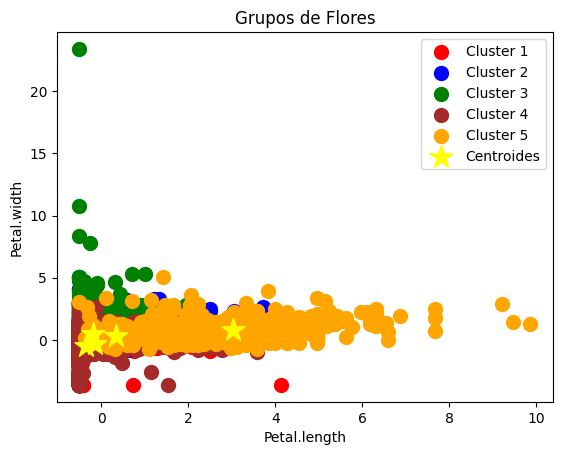

In [36]:
plt.scatter(X[especies == 0, 0], X[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[especies == 1, 0], X[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[especies == 2, 0], X[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(X[especies == 3, 0], X[especies == 3, 1],s=100,c='brown', label = "Cluster 4")
plt.scatter(X[especies == 4, 0], X[especies == 4, 1],s=100,c='orange', label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Flores")
plt.xlabel("Petal.length")
plt.ylabel("Petal.width")
plt.legend()